# **Human Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.4 MB/s eta 0:00:00


In [ ]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from IPython.display import Image
import Bio
from Bio.Seq import Seq
from Bio.SeqUtils import GC
plt.style.use('seaborn-darkgrid')
%matplotlib inline

<ipython-input-3-579dcbac167d>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# **EDA**

In [ ]:
labels = ['G protein coupled receptors','Tyrosine Kinase','Tyrosine phosphatase','Synthetase','Synthase','Ion channel','Transcription Factor']

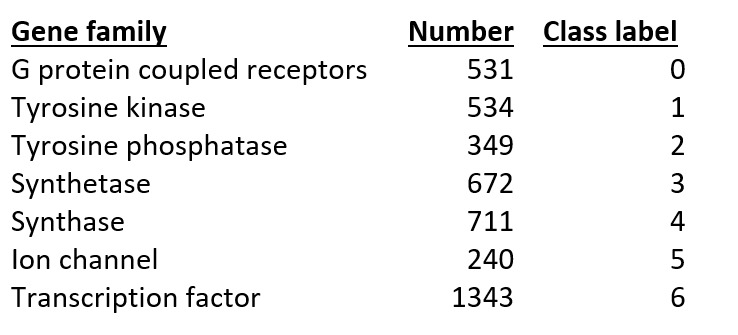

In [ ]:
Image('/content/drive/MyDrive/_results_.jpeg')

In [ ]:
import os
os.chdir("/content/drive/MyDrive")

In [ ]:
human= pd.read_table('human_data.txt')
human.head(3500)

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
3495,ATGCCGTGGTTCCACGGGAAGATCTCGGGCCAGGAGGCTGTCCAGC...,1
3496,ATGGCGGGGCGAGGCTCTCTGGTTTCCTGGCGGGCATTTCACGGCT...,1
3497,ATGCCAACGAGGCGCTGGGCCCCGGGCACCCAGTGTATCACCAAAT...,1
3498,ATGGCGGGGCGAGGCTCTCTGGTTTCCTGGCGGGCATTT,1


In [ ]:
human.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [ ]:
human.describe()

,class
count,4380.000000
mean,3.504566
std,2.132134
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


In [ ]:
human["class"].value_counts()

6    1343
4     711
3     672
1     534
0     531
2     349
5     240
Name: class, dtype: int64

In [ ]:
seq = Seq(human["sequence"][0])
print(seq)

ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG


In [ ]:
print(f" Complement : {seq.complement()} \n")
print(f"Reverse Complement :  {seq.reverse_complement()} " )

 Complement : TACGGGGTTGATTTATGATGGCATACCGGGTGGTATTAATGGGGGTATGAGGAATGTGATAAGGAGTAGTGGGTTGATTTTTATAATTTGTGTTTGATGGTGGATGGAGGGAGTGGTTTCGGGTATTTTTATTTTTTAATATTGTTTGGGACTCTTGGTTTTACTTGCTTTTAGACAAGCGAAGTAAGTAACGGGGGTGTTAGGATC 

Reverse Complement :  CTAGGATTGTGGGGGCAATGAATGAAGCGAACAGATTTTCGTTCATTTTGGTTCTCAGGGTTTGTTATAATTTTTTATTTTTATGGGCTTTGGTGAGGGAGGTAGGTGGTAGTTTGTGTTTAATATTTTTAGTTGGGTGATGAGGAATAGTGTAAGGAGTATGGGGGTAATTATGGTGGGCCATACGGTAGTATTTAGTTGGGGCAT 


In [ ]:
print("GC% :\t" + str(GC(seq)))

GC% :	39.61352657004831


/usr/local/lib/python3.10/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


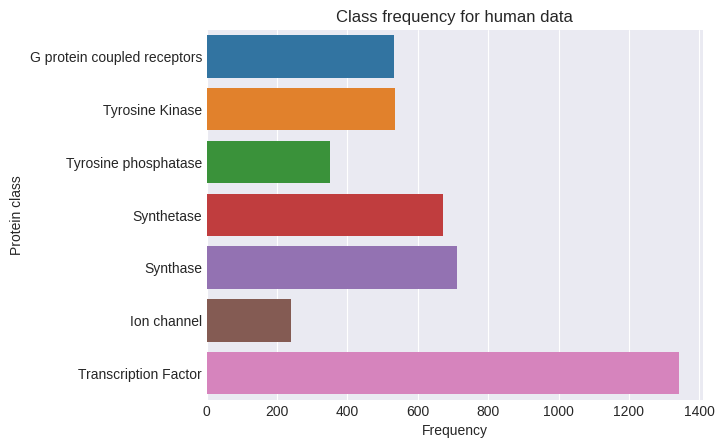

In [ ]:
sns.barplot(x=human["class"].value_counts().sort_index(),y=labels)
plt.title("Class frequency for human data")
plt.xlabel('Frequency')
plt.ylabel('Protein class')
#plt.style.use('dark_background')
plt.show()

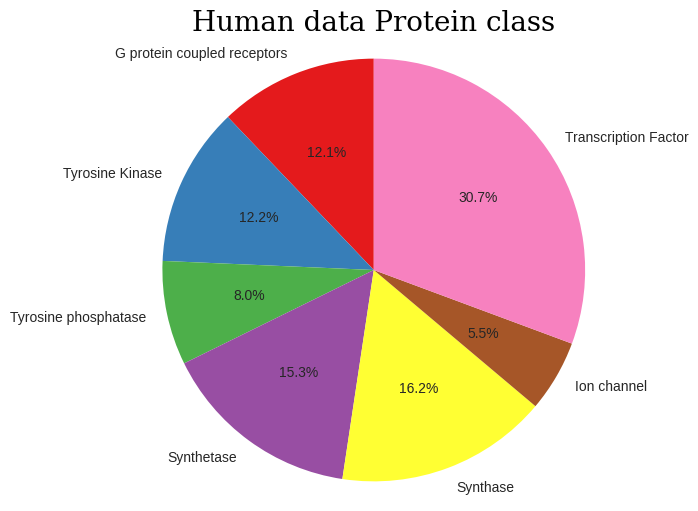

In [ ]:
plt.figure(figsize=(6,6))
font_dict=font = {'family': 'serif',
        'color':  'Black',
        'size': 20,
        }
a=np.random.random(7)
cs=cm.Set1(np.arange(7)/7.)
plt.pie(human["class"].value_counts().sort_index(),labels=labels,autopct='%1.1f%%',colors=cs,startangle=90)
plt.axis('equal')
plt.title("Human data Protein class",fontdict=font_dict)
#plt.style.use('dark_background')
plt.show()

In [ ]:
human['sequence'][20]

'ATGGCGGATTCCAGCGAAGGCCCCCGCGCGGGGCCCGGGGAGGTGGCTGAGCTCCCCGGGGATGAGAGTGGCACCCCAGGTGGGGAGGCTTTTCCTCTCTCCTCCCTGGCCAATCTGTTTGAGGGGGAGGATGGCTCCCTTTCGCCCTCACCGGCTGATGCCAGTCGCCCTGCTGGCCCAGGCGATGGGCGACCAAATCTGCGCATGAAGTTCCAGGGCGCCTTCCGCAAGGGGGTGCCCAACCCCATCGATCTGCTGGAGTCCACCCTATATGAGTCCTCGGTGGTGCCTGGGCCCAAGAAAGCACCCATGGACTCACTGTTTGACTACGGCACCTATCGTCACCACTCCAGTGACAACAAGAGGTGGAGGAAGAAGATCATAGAGAAGCAGCCGCAGAGCCCCAAAGCCCCTGCCCCTCAGCCGCCCCCCATCCTCAAAGTCTTCAACCGGCCTATCCTCTTTGACATCGTGTCCCGGGGCTCCACTGCTGACCTGGACGGGCTGCTCCCATTCTTGCTGACCCACAAGAAACGCCTAACTGATGAGGAGTTTCGAGAGCCATCTACGGGGAAGACCTGCCTGCCCAAGGCCTTGCTGAACCTGAGCAATGGCCGCAACGACACCATCCCTGTGCTGCTGGACATCGCGGAGCGCACCGGCAACATGAGGGAGTTCATTAACTCGCCCTTCCGTGACATCTACTATCGAGGTCAGACAGCCCTGCACATCGCCATTGAGCGTCGCTGCAAACACTACGTGGAACTTCTCGTGGCCCAGGGAGCTGATGTCCACGCCCAGGCCCGTGGGCGCTTCTTCCAGCCCAAGGATGAGGGGGGCTACTTCTACTTTGGGGAGCTGCCCCTGTCGCTGGCTGCCTGCACCAACCAGCCCCACATTGTCAACTACCTGACGGAGAACCCCCACAAGAAGGCGGACATGCGGCGCCAGGACTCGCGAGGCAACACAGTGCTGCATGCGCTGGTGGCCATTGCTGAC

In [ ]:
def noise_check(arr):
    d=[]
    count = 0
    for i in range(0,len(arr)):
        for j in arr['sequence'][i]:
            if j!='A' and j!='T' and j!='C' and j!='G':
                count = count + 1
                d.append(j)
    if count>0:
        print(d)
        print('Noise Count',count)
    else:
        print('No noise')

In [ ]:
noise_check(human)

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

In [ ]:
def remove_noise(arr):
  for i in range (0,len(arr)):
    arr['sequence'][i]=arr['sequence'][i].replace('N','')

In [ ]:
remove_noise(human)

<ipython-input-19-b76a0a5e3e02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr['sequence'][i]=arr['sequence'][i].replace('N','')


In [ ]:
noise_check(human)

No noise


In [ ]:
def missing_check(arr):
    classat=[]
    seqat=[]
    count = 0
    for i in range(0,len(arr)):
        if arr['sequence'][i]=='':
            seqat.append(i)
            count = count + 1
        if arr['class'][i]=='' or arr['class'][i]>6:
            classat.append(i)
            count = count + 1
    if count==0:
        print('No missing value')
    else:
        print('missing count = ',count)

In [ ]:
missing_check(human)

No missing value


<Axes: >

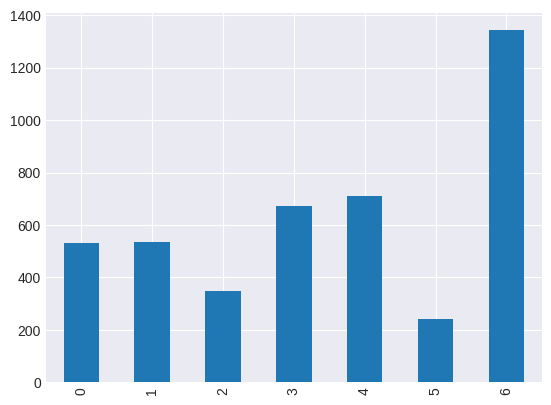

In [ ]:
human['class'].value_counts().sort_index().plot.bar()
#plt.style.use('dark_background')

In [ ]:
y=human.loc[:,'class'].values

# **Classifiers**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
documents = [
    "This is the first document.",
    "And My name is Manoj Dey.",
    "And team members are Sayantika Das,Koustubh Manjumdar,Madhushree Ghosh .",
    "Is this our first Prject ?"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()
print("Matrix of token counts:")
print(X.toarray())
print("\nFeature names:")
print(feature_names)

Matrix of token counts:
[[0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1]]

Feature names:
['and' 'are' 'das' 'dey' 'document' 'first' 'ghosh' 'is' 'koustubh'
 'madhushree' 'manjumdar' 'manoj' 'members' 'my' 'name' 'our' 'prject'
 'sayantika' 'team' 'the' 'this']


In [ ]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]
cv = CountVectorizer(ngram_range=(4,4))

In [ ]:
human['Words']=human.apply(lambda X: getKmers(X['sequence']),axis=1)
human=human.drop('sequence',axis =1)

In [ ]:
human.head()

,class,Words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [ ]:
human["in_string"] =human['Words'].apply(lambda x:  ' '.join(x))

In [ ]:
human[["Words","in_string"]]

,Words,in_string
0,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...",atgccc tgcccc gcccca ccccaa cccaac ccaact caac...
1,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...",atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaa...
2,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...",atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...",atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
4,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...",atgcaa tgcaac gcaaca caacag aacagc acagca cagc...
...,...,...
4375,"[atggaa, tggaag, ggaaga, gaagat, aagatt, agatt...",atggaa tggaag ggaaga gaagat aagatt agattt gatt...
4376,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...",atgcag tgcagt gcagtc cagtcc agtcct gtcctt tcct...
4377,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...",atgcag tgcagt gcagtc cagtcc agtcct gtcctt tcct...
4378,"[atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc...",atgggg tggggc ggggca gggcac ggcacc gcacct cacc...


In [ ]:
print(human['Words'][0])

['atgccc', 'tgcccc', 'gcccca', 'ccccaa', 'cccaac', 'ccaact', 'caacta', 'aactaa', 'actaaa', 'ctaaat', 'taaata', 'aaatac', 'aatact', 'atacta', 'tactac', 'actacc', 'ctaccg', 'taccgt', 'accgta', 'ccgtat', 'cgtatg', 'gtatgg', 'tatggc', 'atggcc', 'tggccc', 'ggccca', 'gcccac', 'cccacc', 'ccacca', 'caccat', 'accata', 'ccataa', 'cataat', 'ataatt', 'taatta', 'aattac', 'attacc', 'ttaccc', 'tacccc', 'accccc', 'ccccca', 'ccccat', 'cccata', 'ccatac', 'catact', 'atactc', 'tactcc', 'actcct', 'ctcctt', 'tcctta', 'ccttac', 'cttaca', 'ttacac', 'tacact', 'acacta', 'cactat', 'actatt', 'ctattc', 'tattcc', 'attcct', 'ttcctc', 'tcctca', 'cctcat', 'ctcatc', 'tcatca', 'catcac', 'atcacc', 'tcaccc', 'caccca', 'acccaa', 'cccaac', 'ccaact', 'caacta', 'aactaa', 'actaaa', 'ctaaaa', 'taaaaa', 'aaaaat', 'aaaata', 'aaatat', 'aatatt', 'atatta', 'tattaa', 'attaaa', 'ttaaac', 'taaaca', 'aaacac', 'aacaca', 'acacaa', 'cacaaa', 'acaaac', 'caaact', 'aaacta', 'aactac', 'actacc', 'ctacca', 'taccac', 'accacc', 'ccacct', 'caccta',

In [ ]:
human_texts = list(human['Words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])

In [ ]:
X_h = cv.fit_transform(human_texts)
y_h = human.iloc[:, 0].values

In [ ]:
print(X_h.shape,y_h.shape)

(4380, 231928) (4380,)


In [ ]:
i=0
for key,value in cv.vocabulary_.items():
    print(f"{key} : {value}")
    i+=1
    if i>10:break

atgccc tgcccc gcccca ccccaa : 52803
tgcccc gcccca ccccaa cccaac : 207483
gcccca ccccaa cccaac ccaact : 136621
ccccaa cccaac ccaact caacta : 79202
cccaac ccaact caacta aactaa : 78295
ccaact caacta aactaa actaaa : 74681
caacta aactaa actaaa ctaaat : 60650
aactaa actaaa ctaaat taaata : 6563
actaaa ctaaat taaata aaatac : 25724
ctaaat taaata aaatac aatact : 101750
taaata aaatac aatact atacta : 175710


In [ ]:
(human_texts[1])

'atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatctg atctgt tctgtt ctgttc tgttcg gttcgc ttcgct tcgctt cgcttc gcttca cttcat ttcatt tcattc cattca attcat ttcatt tcattg cattgc attgcc ttgccc tgcccc gccccc ccccca ccccac cccaca ccacaa cacaat acaatc caatcc aatcct atccta tcctag cctagg ctaggc taggcc aggcct ggccta gcctac cctacc ctaccc tacccg acccgc cccgcc ccgccg cgccgc gccgca ccgcag cgcagt gcagta cagtac agtact gtactg tactga actgat ctgatc tgatca gatcat atcatt tcattc cattct attcta ttctat tctatt ctattt tatttc atttcc tttccc ttcccc tccccc ccccct cccctc ccctct cctcta ctctat tctatt ctattg tattga attgat ttgatc tgatcc gatccc atcccc tcccca ccccac cccacc ccacct cacctc acctcc cctcca ctccaa tccaaa ccaaat caaata aaatat aatatc atatct tatctc atctca tctcat ctcatc tcatca catcaa atcaac tcaaca caacaa aacaac acaacc caaccg aaccga accgac ccgact cgacta gactaa actaat ctaatc taatca aatcac atcacc tcacca caccac accacc ccaccc caccca acccaa cccaac ccaaca caacaa aacaat acaatg caatga aatgac atgact tgacta gacta

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import *

In [ ]:
from sklearn.model_selection import train_test_split
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h,y_h,test_size = 0.25,random_state=42)

In [ ]:
dtree_h = DecisionTreeClassifier()
dtree_h.fit(X_train_h,y_train_h)
dtree_h_pred = dtree_h.predict(X_test_h)
print(confusion_matrix(y_test_h, dtree_h_pred))
print(classification_report(y_test_h, dtree_h_pred))

[[102   1   1   7   4   2   4]
 [ 10 106   1   5   5   0   4]
 [  3   1  77   5   1   1   5]
 [ 13   8   4 112   7   0   6]
 [ 18   5   1   3 143   4  10]
 [  6   1   0   2   1  52   3]
 [ 33   4   1  11  12   3 287]]
              precision    recall  f1-score   support

           0       0.55      0.84      0.67       121
           1       0.84      0.81      0.82       131
           2       0.91      0.83      0.87        93
           3       0.77      0.75      0.76       150
           4       0.83      0.78      0.80       184
           5       0.84      0.80      0.82        65
           6       0.90      0.82      0.86       351

    accuracy                           0.80      1095
   macro avg       0.81      0.80      0.80      1095
weighted avg       0.82      0.80      0.81      1095



In [ ]:
rf_h = RandomForestClassifier(n_estimators=400)
rf_h.fit(X_train_h,y_train_h)
rf_h_pred = rf_h.predict(X_test_h)
print(confusion_matrix(y_test_h, rf_h_pred))
print(classification_report(y_test_h, rf_h_pred))

[[111   0   0   4   0   0   6]
 [  2 118   0   7   0   0   4]
 [  1   0  81   5   0   0   6]
 [  3   0   0 140   1   0   6]
 [  5   0   0   8 166   0   5]
 [  5   0   0   2   0  55   3]
 [  7   0   0   8   0   0 336]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       121
           1       1.00      0.90      0.95       131
           2       1.00      0.87      0.93        93
           3       0.80      0.93      0.86       150
           4       0.99      0.90      0.95       184
           5       1.00      0.85      0.92        65
           6       0.92      0.96      0.94       351

    accuracy                           0.92      1095
   macro avg       0.94      0.90      0.92      1095
weighted avg       0.93      0.92      0.92      1095



In [ ]:
xgb_h = xgb.XGBClassifier()
xgb_h.fit(X_train_h,y_train_h)
xgb_h_pred = xgb_h.predict(X_test_h)
print(confusion_matrix(y_test_h, xgb_h_pred))
print(classification_report(y_test_h,xgb_h_pred))

[[ 99   0   0   3   3   0  16]
 [  0 111   0   3   0   0  17]
 [  0   2  79   1   1   0  10]
 [  0   0   1 131   3   0  15]
 [  1   0   0   5 162   0  16]
 [  1   0   0   0   0  57   7]
 [  2   1   0   2   1   0 345]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       121
           1       0.97      0.85      0.91       131
           2       0.99      0.85      0.91        93
           3       0.90      0.87      0.89       150
           4       0.95      0.88      0.92       184
           5       1.00      0.88      0.93        65
           6       0.81      0.98      0.89       351

    accuracy                           0.90      1095
   macro avg       0.94      0.88      0.90      1095
weighted avg       0.91      0.90      0.90      1095



In [ ]:
NB_h = MultinomialNB(alpha=0.1)
NB_h.fit(X_train_h,y_train_h)
NB_h_pred = NB_h.predict(X_test_h)
print(confusion_matrix(y_test_h, NB_h_pred))
print(classification_report(y_test_h,NB_h_pred))

[[119   0   0   0   1   0   1]
 [  0 127   0   0   0   0   4]
 [  1   0  92   0   0   0   0]
 [  0   0   0 149   0   0   1]
 [  1   0   0   0 178   0   5]
 [  1   0   0   0   2  62   0]
 [  5   1   0   1   0   0 344]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       121
           1       0.99      0.97      0.98       131
           2       1.00      0.99      0.99        93
           3       0.99      0.99      0.99       150
           4       0.98      0.97      0.98       184
           5       1.00      0.95      0.98        65
           6       0.97      0.98      0.97       351

    accuracy                           0.98      1095
   macro avg       0.98      0.98      0.98      1095
weighted avg       0.98      0.98      0.98      1095



In [ ]:
AdaB_h = AdaBoostClassifier(n_estimators=400)
AdaB_h.fit(X_train_h,y_train_h)
AdaB_h_pred = AdaB_h.predict(X_test_h)
print(confusion_matrix(y_test_h, AdaB_h_pred))
print(classification_report(y_test_h, AdaB_h_pred))

[[ 47   3   1   7   6   0  57]
 [ 13  52   6   4   6   1  49]
 [  3   2  58   7   5   0  18]
 [ 13   2   0  45   5   1  84]
 [ 10   1   7   6  43   2 115]
 [  6   1   4   5   0  18  31]
 [ 15   3   1   9  21   3 299]]
              precision    recall  f1-score   support

           0       0.44      0.39      0.41       121
           1       0.81      0.40      0.53       131
           2       0.75      0.62      0.68        93
           3       0.54      0.30      0.39       150
           4       0.50      0.23      0.32       184
           5       0.72      0.28      0.40        65
           6       0.46      0.85      0.60       351

    accuracy                           0.51      1095
   macro avg       0.60      0.44      0.48      1095
weighted avg       0.56      0.51      0.49      1095



In [ ]:
MLP_h = MLPClassifier(alpha=1)
MLP_h.fit(X_train_h,y_train_h)
MLP_h_pred = MLP_h.predict(X_test_h)
print(confusion_matrix(y_test_h, MLP_h_pred))
print(classification_report(y_test_h, MLP_h_pred))

[[112   1   0   1   4   0   3]
 [  0 123   0   1   0   0   7]
 [  1   2  86   0   2   0   2]
 [  0   0   0 143   0   0   7]
 [  2   0   0   1 178   0   3]
 [  1   0   0   1   0  62   1]
 [  1   1   0   3   4   1 341]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       121
           1       0.97      0.94      0.95       131
           2       1.00      0.92      0.96        93
           3       0.95      0.95      0.95       150
           4       0.95      0.97      0.96       184
           5       0.98      0.95      0.97        65
           6       0.94      0.97      0.95       351

    accuracy                           0.95      1095
   macro avg       0.96      0.95      0.96      1095
weighted avg       0.95      0.95      0.95      1095



In [ ]:
SVC_h = SVC()
SVC_h.fit(X_train_h,y_train_h)
SVC_h_pred = SVC_h.predict(X_test_h)
print(confusion_matrix(y_test_h, SVC_h_pred))
print(classification_report(y_test_h, SVC_h_pred))

[[ 84   0   0   0   0   0  37]
 [  1  90   0   0   0   0  40]
 [  1   0  68   0   0   0  24]
 [  0   0   0 109   0   0  41]
 [  1   0   0   0 145   0  38]
 [  3   0   0   0   0  43  19]
 [  0   0   0   0   0   0 351]]
              precision    recall  f1-score   support

           0       0.93      0.69      0.80       121
           1       1.00      0.69      0.81       131
           2       1.00      0.73      0.84        93
           3       1.00      0.73      0.84       150
           4       1.00      0.79      0.88       184
           5       1.00      0.66      0.80        65
           6       0.64      1.00      0.78       351

    accuracy                           0.81      1095
   macro avg       0.94      0.76      0.82      1095
weighted avg       0.88      0.81      0.82      1095



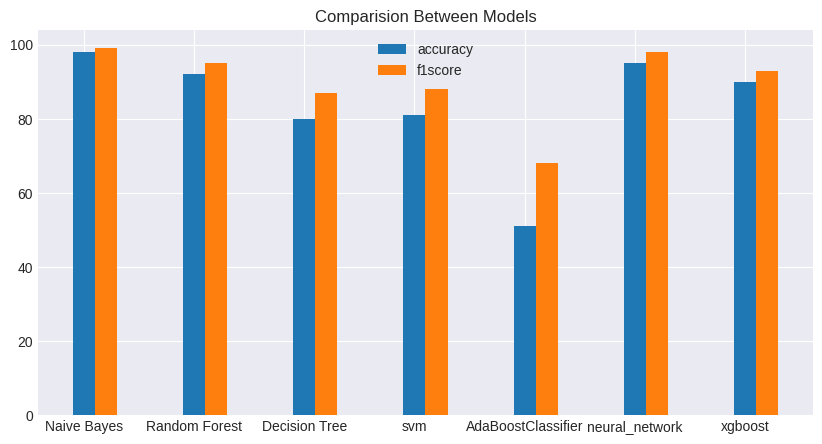

In [ ]:
plt.figure(figsize=(10,5))
scores=["Naive Bayes","Random Forest","Decision Tree","svm","AdaBoostClassifier","neural_network","xgboost"]
accscore=[98,92,80,81,51,95,90]
f1score=[99,95,87,88,68,98,93]
w=0.2
bar1=np.arange(len(scores))
bar2=[i+w for i in bar1]

plt.bar(bar1,accscore,w,label="accuracy")
plt.bar(bar2,f1score,w,label="f1score")
plt.xticks(bar1, scores)
plt.legend()
plt.title("Comparision Between Models")
#plt.style.use('dark_background')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h,
                                                    y_h,
                                                    test_size = 0.20,
                                                    random_state=42)
nb_ =MultinomialNB(alpha=0.01)
nb_.fit(X_train_h, y_train_h)

y_pred = nb_.predict(X_test_h)
print(pd.crosstab(pd.Series(y_test_h, name='Actual'), pd.Series(y_pred, name='Predicted')))

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    0   0    3
1           0  100   0    0    0   0    6
2           0    0  78    0    0   0    0
3           0    0   0  122    0   0    3
4           0    0   0    0  143   0    6
5           0    0   0    0    0  51    0
6           0    0   0    0    0   0  265


In [ ]:
import pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(nb_, open(filename, 'wb'))

<Axes: xlabel='Predicted', ylabel='Actual'>

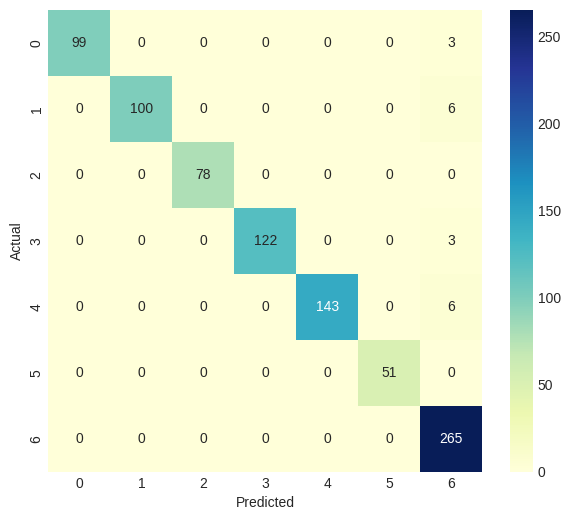

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(pd.crosstab(pd.Series(y_test_h, name='Actual'), pd.Series(y_pred, name='Predicted')),cmap="YlGnBu",annot=True,fmt='d')
#plt.style.use('dark_background')

# **For Chimpanzee**

In [ ]:
pip install biopython

In [ ]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from IPython.display import Image
import Bio
from Bio.Seq import Seq
from Bio.SeqUtils import GC
plt.style.use('seaborn-darkgrid')
%matplotlib inline

<ipython-input-54-579dcbac167d>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [ ]:
labels = ['G protein coupled receptors','Tyrosine Kinase','Tyrosine phosphatase','Synthetase','Synthase','Ion channel','Transcription Factor']

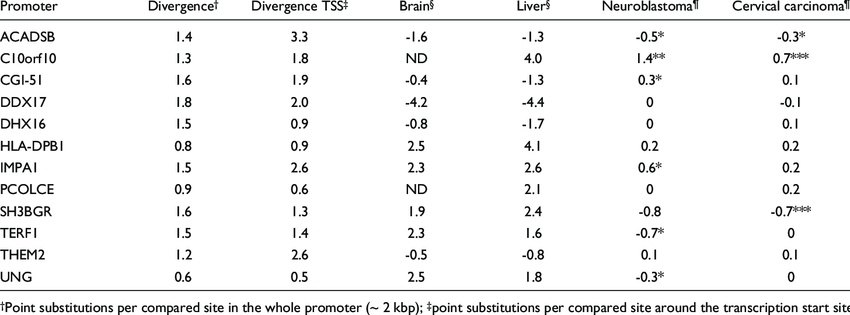

In [ ]:
Image('/content/drive/MyDrive/chimp_dna.png')

In [ ]:
chimpanzee = pd.read_table('chimp_data.txt')
chimpanzee.head(3500)

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6
...,...,...
1677,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1678,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1679,ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGGGGAGTCCGACG...,6
1680,ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAAAGATCTTGAAG...,3


In [ ]:
chimpanzee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  1682 non-null   object
 1   class     1682 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [ ]:
chimpanzee.describe()

,class
count,1682.000000
mean,3.491082
std,2.177486
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


In [ ]:
chimpanzee["class"].value_counts()

6    521
4    261
0    234
3    228
1    185
2    144
5    109
Name: class, dtype: int64

In [ ]:
seq = Seq(chimpanzee["sequence"][0])
print(seq)

ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCATACTCCTGACACTATTTCTCGTCACCCAACTAAAAATATTAAATTCAAATTACCATCTACCCCCCTCACCAAAACCCATAAAAATAAAAAACTACAATAAACCCTGAGAACCAAAATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG


In [ ]:
print(f" Complement : {seq.complement()} \n")
print(f"Reverse Complement :  {seq.reverse_complement()} " )

 Complement : TACGGGGTTGATTTATGGCGGCATACTGGGTGGTATTAATGGGGGTATGAGGACTGTGATAAAGAGCAGTGGGTTGATTTTTATAATTTAAGTTTAATGGTAGATGGGGGGAGTGGTTTTGGGTATTTTTATTTTTTGATGTTATTTGGGACTCTTGGTTTTACTTGCTTTTAGATAAGCGAAGTAAGCGACGGGGGTGTTAGGATC 

Reverse Complement :  CTAGGATTGTGGGGGCAGCGAATGAAGCGAATAGATTTTCGTTCATTTTGGTTCTCAGGGTTTATTGTAGTTTTTTATTTTTATGGGTTTTGGTGAGGGGGGTAGATGGTAATTTGAATTTAATATTTTTAGTTGGGTGACGAGAAATAGTGTCAGGAGTATGGGGGTAATTATGGTGGGTCATACGGCGGTATTTAGTTGGGGCAT 


In [ ]:
print("GC% :\t" + str(GC(seq)))

GC% :	40.09661835748792


/usr/local/lib/python3.10/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


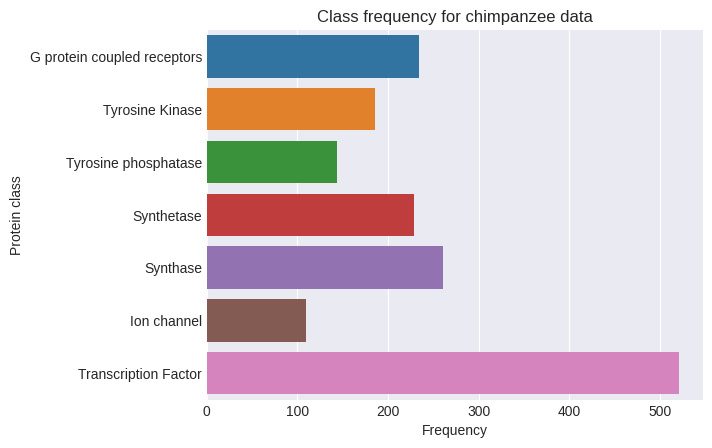

In [ ]:
sns.barplot(x=chimpanzee["class"].value_counts().sort_index(),y=labels)
plt.title("Class frequency for chimpanzee data")
plt.xlabel('Frequency')
plt.ylabel('Protein class')
#plt.style.use('dark_background')
plt.show()

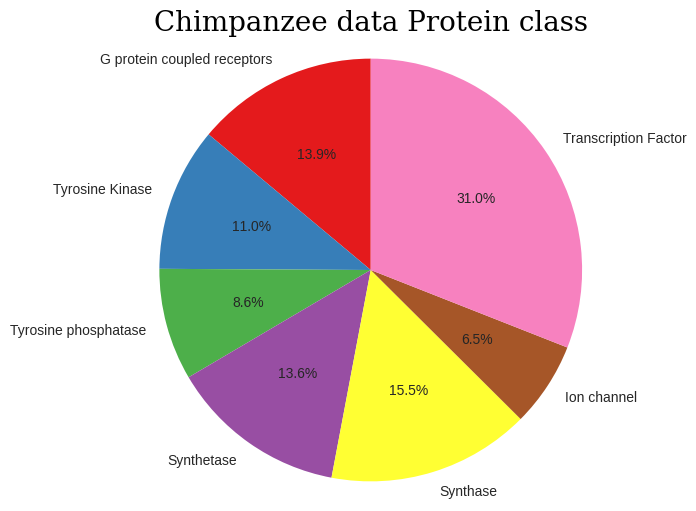

In [ ]:
plt.figure(figsize=(6,6))
font_dict=font = {'family': 'serif',
        'color':  'Black',
        'size': 20,
        }
a=np.random.random(7)
cs=cm.Set1(np.arange(7)/7.)
plt.pie(chimpanzee["class"].value_counts().sort_index(),labels=labels,autopct='%1.1f%%',colors=cs,startangle=90)
plt.axis('equal')
plt.title("Chimpanzee data Protein class",fontdict=font_dict)
#plt.style.use('dark_background')
plt.show()

In [ ]:
chimpanzee['sequence'][20]

'ATGAAAGAAAAGTCCAAAAATGCTGCGCGGACTAGGAGGGAGAAGGAAAACAGTGAATTTTATGAACTGGCTAAATTACTGCCTTTGCCCTCGGCTATCACCTCGCAGCTGGACAAAGCATCCATAATCAGACTCACGACCAGCTATCTCAAAATGAGAGTGGTGTTCCCAGAAGGGCTCGGCGAGGCGTGGGGCCACTCAAGTCGGACCAGCCCCCTGGACAACGTTGGCCGAGAACTGGGCTCCCATCTGCTCCAGACCCTGGATGGCTTCATCTTCGTGGTAGCCCCAGATGGGAAGATCATGTACATCTCAGAGACAGCCTCAGTCCACTTGGGTCTTTCTCAGGTAGAGCTGACCGGAAACAGCATTTATGAATACATTCACCCGGCAGACCACGACGAGATGACGGCGGTGCTCACCGCCCATCAACCCTACCACTCTCACTTCGTGCAGGAGTATGAGATCGAGCGCTCCTTCTTCCTGAGGATGAAGTGCGTCTTGGCCAAGCGTAACGCCGGCCTCACCTGTGGCGGCTACAAGGTCATCCACTGCAGCGGCTACTTGAAGATCCGCCAGTACAGCCTGGACATGTCCCCCTTCGACGGCTGCTACCAAAACGTGGGCCTGGTGGCCGTGGGCCACTCGCTGCCTCCCAGCGCCGTCACGGAGATCAAGCTACACAGCAATATGTTTATGTTCCGCGCCAGCCTGGACATGAAGCTCATCTTTCTGGACTCCAGGGTGGCGGAGCTGACGGGGTACGAACCTCAGGACCTGATTGAGAAGACTCTGTACCACCATGTGCACGGCTGCGACACCTTCCACCTGCGCTGCGCGCTGGTTCACCACCATCTGCCTCCTGGACAGGTGACCACCAAGTACTACAGGTTCCTGGCGAAACACGGCGGCTGGGTATGGGTGCAGAGCTACGCGACCATCGTGCACAACAGTCGCTCCTCCAGGCCACACTGTATCGTCAGCGTCAACTATGTCCTC

In [ ]:
def noise_check(arr):
    d=[]
    count = 0
    for i in range(0,len(arr)):
        for j in arr['sequence'][i]:
            if j!='A' and j!='T' and j!='C' and j!='G':
                count = count + 1
                d.append(j)
    if count>0:
        print(d)
        print('Noise Count',count)
    else:
        print('No noise')

In [ ]:
noise_check(chimpanzee)

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
Noise Count 163


In [ ]:
def remove_noise(arr):
  for i in range (0,len(arr)):
    arr['sequence'][i]=arr['sequence'][i].replace('N','')

In [ ]:
remove_noise(chimpanzee)

<ipython-input-69-b76a0a5e3e02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr['sequence'][i]=arr['sequence'][i].replace('N','')


In [ ]:
noise_check(chimpanzee)

No noise


In [ ]:
def missing_check(arr):
    classat=[]
    seqat=[]
    count = 0
    for i in range(0,len(arr)):
        if arr['sequence'][i]=='':
            seqat.append(i)
            count = count + 1
        if arr['class'][i]=='' or arr['class'][i]>6:
            classat.append(i)
            count = count + 1
    if count==0:
        print('No missing value')
    else:
        print('missing count = ',count)

In [ ]:
missing_check(chimpanzee)

No missing value


<Axes: >

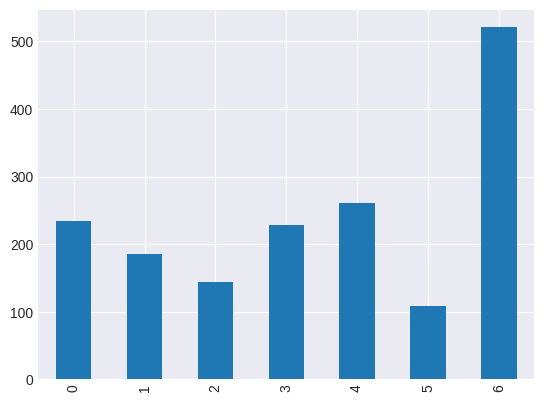

In [ ]:
chimpanzee['class'].value_counts().sort_index().plot.bar()
#plt.style.use('dark_background')

In [ ]:
y=chimpanzee.loc[:,'class'].values

# **Classifiers**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
documents = [
    "This is the first document.",
    "And My name is Manoj Dey.",
    "And team members are Sayantika Das,Koustubh Manjumdar,Madhushree Ghosh .",
    "Is this our first Prject ?"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()
print("Matrix of token counts:")
print(X.toarray())
print("\nFeature names:")
print(feature_names)

Matrix of token counts:
[[0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1]]

Feature names:
['and' 'are' 'das' 'dey' 'document' 'first' 'ghosh' 'is' 'koustubh'
 'madhushree' 'manjumdar' 'manoj' 'members' 'my' 'name' 'our' 'prject'
 'sayantika' 'team' 'the' 'this']


In [ ]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]
cv = CountVectorizer(ngram_range=(4,4))

In [ ]:
chimpanzee['Words']=chimpanzee.apply(lambda X: getKmers(X['sequence']),axis=1)
chimpanzee=chimpanzee.drop('sequence',axis =1)

In [ ]:
chimpanzee.head()

,class,Words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [ ]:
chimpanzee["in_string"] =chimpanzee['Words'].apply(lambda x:  ' '.join(x))

In [ ]:
chimpanzee[["Words","in_string"]]

,Words,in_string
0,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...",atgccc tgcccc gcccca ccccaa cccaac ccaact caac...
1,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...",atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaa...
2,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc...",atggcc tggcct ggcctc gcctcg cctcgc ctcgcg tcgc...
3,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc...",atggcc tggcct ggcctc gcctcg cctcgc ctcgcg tcgc...
4,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg...",atgggc tgggca gggcag ggcagc gcagcg cagcgc agcg...
...,...,...
1677,"[atgctg, tgctga, gctgag, ctgagc, tgagcg, gagcg...",atgctg tgctga gctgag ctgagc tgagcg gagcgg agcg...
1678,"[atgctg, tgctga, gctgag, ctgagc, tgagcg, gagcg...",atgctg tgctga gctgag ctgagc tgagcg gagcgg agcg...
1679,"[atgaag, tgaagc, gaagcg, aagcga, agcgac, gcgac...",atgaag tgaagc gaagcg aagcga agcgac gcgacc cgac...
1680,"[atgact, tgactg, gactgg, actgga, ctggaa, tggaa...",atgact tgactg gactgg actgga ctggaa tggaac ggaa...


In [ ]:
print(chimpanzee['Words'][0])

['atgccc', 'tgcccc', 'gcccca', 'ccccaa', 'cccaac', 'ccaact', 'caacta', 'aactaa', 'actaaa', 'ctaaat', 'taaata', 'aaatac', 'aatacc', 'ataccg', 'taccgc', 'accgcc', 'ccgccg', 'cgccgt', 'gccgta', 'ccgtat', 'cgtatg', 'gtatga', 'tatgac', 'atgacc', 'tgaccc', 'gaccca', 'acccac', 'cccacc', 'ccacca', 'caccat', 'accata', 'ccataa', 'cataat', 'ataatt', 'taatta', 'aattac', 'attacc', 'ttaccc', 'tacccc', 'accccc', 'ccccca', 'ccccat', 'cccata', 'ccatac', 'catact', 'atactc', 'tactcc', 'actcct', 'ctcctg', 'tcctga', 'cctgac', 'ctgaca', 'tgacac', 'gacact', 'acacta', 'cactat', 'actatt', 'ctattt', 'tatttc', 'atttct', 'tttctc', 'ttctcg', 'tctcgt', 'ctcgtc', 'tcgtca', 'cgtcac', 'gtcacc', 'tcaccc', 'caccca', 'acccaa', 'cccaac', 'ccaact', 'caacta', 'aactaa', 'actaaa', 'ctaaaa', 'taaaaa', 'aaaaat', 'aaaata', 'aaatat', 'aatatt', 'atatta', 'tattaa', 'attaaa', 'ttaaat', 'taaatt', 'aaattc', 'aattca', 'attcaa', 'ttcaaa', 'tcaaat', 'caaatt', 'aaatta', 'aattac', 'attacc', 'ttacca', 'taccat', 'accatc', 'ccatct', 'catcta',

In [ ]:
chimpanzee_texts1 = list(chimpanzee['Words'])
for item in range(len(chimpanzee_texts1)):
    chimpanzee_texts1[item] = ' '.join(chimpanzee_texts1[item])

In [ ]:
X_c = cv.fit_transform( chimpanzee_texts1)
y_c = chimpanzee.iloc[:, 0].values

In [ ]:
print(X_c.shape,y_c.shape)

(1682, 229663) (1682,)


In [ ]:
i=0
for key,value in cv.vocabulary_.items():
    print(f"{key} : {value}")
    i+=1
    if i>10:break

atgccc tgcccc gcccca ccccaa : 52351
tgcccc gcccca ccccaa cccaac : 205442
gcccca ccccaa cccaac ccaact : 135397
ccccaa cccaac ccaact caacta : 78622
cccaac ccaact caacta aactaa : 77721
ccaact caacta aactaa actaaa : 74120
caacta aactaa actaaa ctaaat : 60144
aactaa actaaa ctaaat taaata : 6492
actaaa ctaaat taaata aaatac : 25504
ctaaat taaata aaatac aatacc : 100808
taaata aaatac aatacc ataccg : 174028


In [ ]:
(chimpanzee_texts1[1])

'atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatcta atctat tctatt ctattc tattcg attcgc ttcgct tcgctt cgcttc gcttca cttcat ttcatt tcattc cattcg attcgc ttcgct tcgctg cgctgc gctgcc ctgccc tgcccc gccccc ccccca ccccac cccaca ccacaa cacaat acaatc caatcc aatcct atccta tcctag cctagg ctaggc taggct aggctt ggctta gcttac cttacc ttaccc tacccg acccgc cccgcc ccgccg cgccgc gccgca ccgcag cgcagt gcagta cagtac agtact gtacta tactaa actaat ctaatc taatca aatcat atcatt tcattc cattct attcta ttctat tctatt ctattc tattcc attccc ttcccc tccccc cccccc ccccct cccctc ccctct cctcta ctctac tctact ctactg tactgg actggt ctggtc tggtcc ggtccc gtcccc tcccca ccccac cccact ccactt cacttc acttct cttcta ttctaa tctaaa ctaaac taaaca aaacat aacatc acatct catctc atctca tctcat ctcatc tcatca catcaa atcaac tcaaca caacaa aacaac acaacc caaccg aaccga accgac ccgact cgacta gactaa actaat ctaatt taatta aattac attacc ttacca taccac accacc ccaccc caccca acccaa cccaac ccaaca caacaa aacaat acaatg caatga aatgac atgact tgacta gacta

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import *

In [ ]:
from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size = 0.25,random_state=42)

In [ ]:
dtree_c = DecisionTreeClassifier()
dtree_c.fit(X_train_c,y_train_c)
dtree_c_pred = dtree_c.predict(X_test_c)
print(confusion_matrix(y_test_c, dtree_c_pred))
print(classification_report(y_test_c, dtree_c_pred))

[[ 29   0   1   1   1   1  11]
 [  1  43   0   1   1   0   5]
 [  0   0  28   0   0   0   2]
 [  1   0   0  40   7   0   6]
 [  7   1   1   2  37   0  19]
 [  4   1   1   6   2  18   1]
 [  3   2   0   3   7   0 127]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65        44
           1       0.91      0.84      0.88        51
           2       0.90      0.93      0.92        30
           3       0.75      0.74      0.75        54
           4       0.67      0.55      0.61        67
           5       0.95      0.55      0.69        33
           6       0.74      0.89      0.81       142

    accuracy                           0.76       421
   macro avg       0.80      0.74      0.76       421
weighted avg       0.77      0.76      0.76       421



In [ ]:
rf_c = RandomForestClassifier(n_estimators=400)
rf_c.fit(X_train_c,y_train_c)
rf_c_pred = rf_c.predict(X_test_c)
print(confusion_matrix(y_test_c, rf_c_pred))
print(classification_report(y_test_c, rf_c_pred))

[[ 29   0   0   0   0   0  15]
 [  0  45   0   0   0   0   6]
 [  0   0  30   0   0   0   0]
 [  0   0   0  42   0   0  12]
 [  2   0   0   0  42   0  23]
 [  3   0   0   1   1  18  10]
 [  1   0   0   0   0   0 141]]
              precision    recall  f1-score   support

           0       0.83      0.66      0.73        44
           1       1.00      0.88      0.94        51
           2       1.00      1.00      1.00        30
           3       0.98      0.78      0.87        54
           4       0.98      0.63      0.76        67
           5       1.00      0.55      0.71        33
           6       0.68      0.99      0.81       142

    accuracy                           0.82       421
   macro avg       0.92      0.78      0.83       421
weighted avg       0.87      0.82      0.82       421



In [ ]:
xgb_c = xgb.XGBClassifier()
xgb_c.fit(X_train_c,y_train_c)
xgb_c_pred = xgb_c.predict(X_test_c)
print(confusion_matrix(y_test_c, xgb_c_pred))
print(classification_report(y_test_c,xgb_c_pred))

[[ 31   0   1   1   1   1   9]
 [  2  47   0   0   0   0   2]
 [  0   0  29   0   0   0   1]
 [  0   0   0  47   2   0   5]
 [  3   0   1   1  50   0  12]
 [  2   1   0   2   1  18   9]
 [  0   0   0   0   3   0 139]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        44
           1       0.98      0.92      0.95        51
           2       0.94      0.97      0.95        30
           3       0.92      0.87      0.90        54
           4       0.88      0.75      0.81        67
           5       0.95      0.55      0.69        33
           6       0.79      0.98      0.87       142

    accuracy                           0.86       421
   macro avg       0.89      0.82      0.85       421
weighted avg       0.87      0.86      0.85       421



In [ ]:
NB_c = MultinomialNB(alpha=0.1)
NB_c.fit(X_train_c,y_train_c)
NB_c_pred = NB_c.predict(X_test_c)
print(confusion_matrix(y_test_c, NB_c_pred))
print(classification_report(y_test_c,NB_c_pred))

[[ 42   0   0   0   0   0   2]
 [  0  50   0   0   0   0   1]
 [  0   0  28   0   0   0   2]
 [  0   0   0  50   0   0   4]
 [  1   1   0   3  49   0  13]
 [  5   0   0   0   1  18   9]
 [  0   0   0   1   0   0 141]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       0.98      0.98      0.98        51
           2       1.00      0.93      0.97        30
           3       0.93      0.93      0.93        54
           4       0.98      0.73      0.84        67
           5       1.00      0.55      0.71        33
           6       0.82      0.99      0.90       142

    accuracy                           0.90       421
   macro avg       0.94      0.87      0.89       421
weighted avg       0.91      0.90      0.89       421



In [ ]:
AdaB_c = AdaBoostClassifier(n_estimators=400)
AdaB_c.fit(X_train_c,y_train_c)
AdaB_c_pred = AdaB_c.predict(X_test_c)
print(confusion_matrix(y_test_c, AdaB_c_pred))
print(classification_report(y_test_c, AdaB_c_pred))

[[ 18   3   1   2   3   0  17]
 [  8  19   2   3   2   1  16]
 [  2   3   7   5   4   0   9]
 [  3   4   1  15   6   0  25]
 [  2   4   2  10  19   0  30]
 [  9   2   0   0   0  16   6]
 [  9  10   3   6   7   0 107]]
              precision    recall  f1-score   support

           0       0.35      0.41      0.38        44
           1       0.42      0.37      0.40        51
           2       0.44      0.23      0.30        30
           3       0.37      0.28      0.32        54
           4       0.46      0.28      0.35        67
           5       0.94      0.48      0.64        33
           6       0.51      0.75      0.61       142

    accuracy                           0.48       421
   macro avg       0.50      0.40      0.43       421
weighted avg       0.49      0.48      0.46       421



In [ ]:
MLP_c = MLPClassifier(alpha=1)
MLP_c.fit(X_train_c,y_train_c)
MLP_c_pred = MLP_c.predict(X_test_c)
print(confusion_matrix(y_test_c, MLP_c_pred))
print(classification_report(y_test_c, MLP_c_pred))

[[ 42   0   0   0   1   0   1]
 [  0  50   0   0   0   0   1]
 [  1   0  28   0   0   0   1]
 [  3   0   0  51   0   0   0]
 [  9   0   2   0  50   0   6]
 [ 10   0   0   0   0  19   4]
 [  9   0   0   0   0   0 133]]
              precision    recall  f1-score   support

           0       0.57      0.95      0.71        44
           1       1.00      0.98      0.99        51
           2       0.93      0.93      0.93        30
           3       1.00      0.94      0.97        54
           4       0.98      0.75      0.85        67
           5       1.00      0.58      0.73        33
           6       0.91      0.94      0.92       142

    accuracy                           0.89       421
   macro avg       0.91      0.87      0.87       421
weighted avg       0.92      0.89      0.89       421



In [ ]:
SVC_c = SVC()
SVC_c.fit(X_train_c,y_train_c)
SVC_c_pred = SVC_c.predict(X_test_c)
print(confusion_matrix(y_test_c, SVC_c_pred))
print(classification_report(y_test_c, SVC_c_pred))

[[ 28   0   0   0   0   0  16]
 [  0  42   0   0   0   0   9]
 [  0   1  22   0   0   0   7]
 [  1   0   0  31   0   0  22]
 [  0   2   0   0  36   0  29]
 [  2   2   0   0   0  17  12]
 [  0   1   0   0   0   0 141]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        44
           1       0.88      0.82      0.85        51
           2       1.00      0.73      0.85        30
           3       1.00      0.57      0.73        54
           4       1.00      0.54      0.70        67
           5       1.00      0.52      0.68        33
           6       0.60      0.99      0.75       142

    accuracy                           0.75       421
   macro avg       0.91      0.69      0.76       421
weighted avg       0.84      0.75      0.75       421



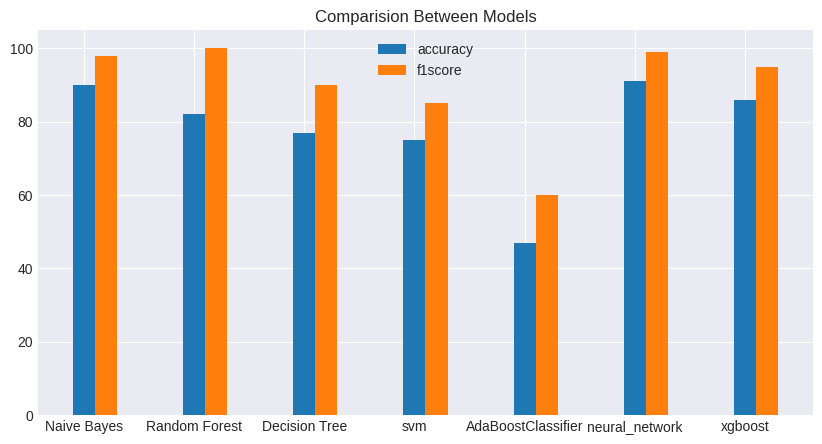

In [ ]:
plt.figure(figsize=(10,5))
scores=["Naive Bayes","Random Forest","Decision Tree","svm","AdaBoostClassifier","neural_network","xgboost"]
accscore=[90,82,77,75,47,91,86]
f1score=[98,100,90,85,60,99,95]
w=0.2
bar1=np.arange(len(scores))
bar2=[i+w for i in bar1]

plt.bar(bar1,accscore,w,label="accuracy")
plt.bar(bar2,f1score,w,label="f1score")
plt.xticks(bar1, scores)
plt.legend()
plt.title("Comparision Between Models")
#plt.style.use('dark_background')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,
                                                    y_c,
                                                    test_size = 0.20,
                                                    random_state=42)
nb_ =MultinomialNB(alpha=0.01)
nb_.fit(X_train_c, y_train_c)

y_pred = nb_.predict(X_test_c)
print(pd.crosstab(pd.Series(y_test_c, name='Actual'), pd.Series(y_pred, name='Predicted')))

Predicted   0   1   2   3   4   5    6
Actual                                
0          26   0   0   0   0   0    2
1           0  38   0   0   0   0    1
2           0   0  25   0   0   0    2
3           0   0   0  40   0   0    3
4           1   0   0   0  40   0   11
5           0   0   0   0   0  18   11
6           0   0   0   0   0   0  119


In [ ]:
import pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(nb_, open(filename, 'wb'))

<Axes: xlabel='Predicted', ylabel='Actual'>

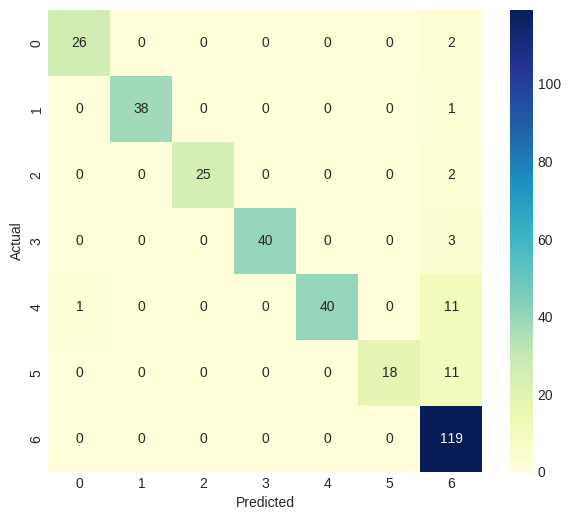

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(pd.crosstab(pd.Series(y_test_c, name='Actual'), pd.Series(y_pred, name='Predicted')),cmap="YlGnBu",annot=True,fmt='d')
#plt.style.use('dark_background')

# **Human VS Chimpanzee**

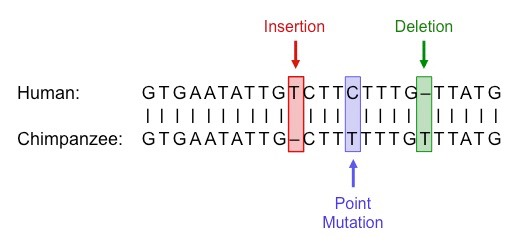

In [ ]:
Image('/content/drive/MyDrive/sequence-alignment_med.jpeg')

# **For Dog DNA Analysis**

In [ ]:
labels = ['G protein coupled receptors','Tyrosine Kinase','Tyrosine phosphatase','Synthetase','Synthase','Ion channel','Transcription Factor']

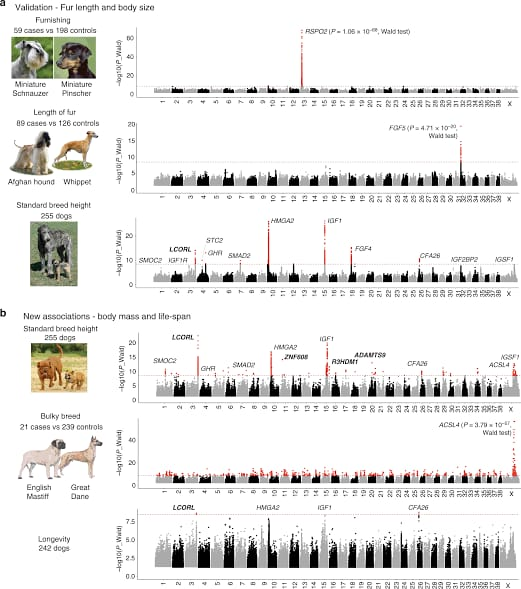

In [ ]:
Image('/content/drive/MyDrive/dog_dna.jpg')

In [ ]:
dog = pd.read_table('dog.txt')
dog.head(3500)

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0
...,...,...
815,ATGGTCGGTCCGGAGAAGGAGCAGAGCTGGATCCCTAAGATCTTCA...,5
816,ATGGCGGCGACGGTGGCTGCGGCGGCCGCCGACGCGGGGCCGGGGG...,6
817,ATGAGCTCGGCCGACAAGGCCCGGGTGGGGCCCGCGGCCGACGGGC...,6
818,GCCCCGAGGATGGGCAGGGTCCCGCTGGCCTGGTGCTTGGCGCTGT...,1


In [ ]:
dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  820 non-null    object
 1   class     820 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.9+ KB


In [ ]:
dog.describe()

,class
count,820.000000
mean,3.521951
std,2.219517
min,0.000000
25%,1.000000
50%,4.000000
75%,6.000000
max,6.000000


In [ ]:
dog["class"].value_counts()

6    260
4    135
0    131
3     95
1     75
2     64
5     60
Name: class, dtype: int64

In [ ]:
seq = Seq(dog["sequence"][0])
print(seq)

ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAATATTTCTCACCCTCTTCATCCTATTTCAACTAAAAATTTCAAATCACTACTACCCAGAAAACCCGATAACCAAATCTGCTAAAATTGCTGGTCAACATAATCCTTGAGAAAACAAATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAA


In [ ]:
print(f" Complement : {seq.complement()} \n")
print(f"Reverse Complement :  {seq.reverse_complement()} " )

 Complement : TACGGTGTCGATCTATGTAGGTGGACTAAATAATATTAGAAAAGTTATAAAGAGTGGGAGAAGTAGGATAAAGTTGATTTTTAAAGTTTAGTGATGATGGGTCTTTTGGGCTATTGGTTTAGACGATTTTAACGACCAGTTGTATTAGGAACTCTTTTGTTTACTTGCTTTTAGATAAGCGAAGAAAGCGACGGGGGAGTTATT 

Reverse Complement :  TTATTGAGGGGGCAGCGAAAGAAGCGAATAGATTTTCGTTCATTTGTTTTCTCAAGGATTATGTTGACCAGCAATTTTAGCAGATTTGGTTATCGGGTTTTCTGGGTAGTAGTGATTTGAAATTTTTAGTTGAAATAGGATGAAGAGGGTGAGAAATATTGAAAAGATTATAATAAATCAGGTGGATGTATCTAGCTGTGGCAT 


In [ ]:
print("GC% :\t" + str(GC(seq)))

GC% :	35.294117647058826


/usr/local/lib/python3.10/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


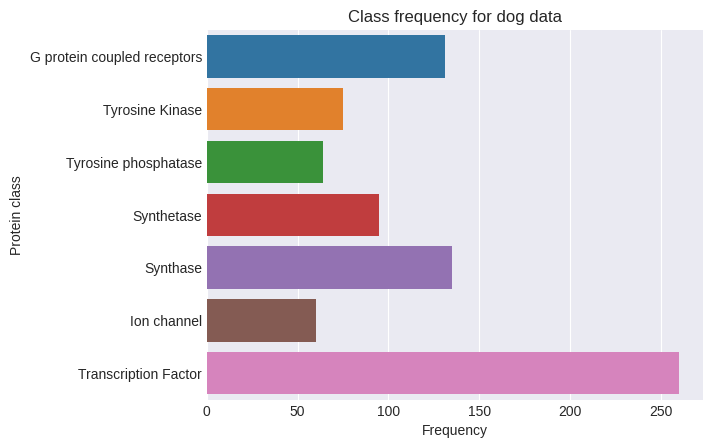

In [ ]:
sns.barplot(x=dog["class"].value_counts().sort_index(),y=labels)
plt.title("Class frequency for dog data")
plt.xlabel('Frequency')
plt.ylabel('Protein class')
#plt.style.use('dark_background')
plt.show()

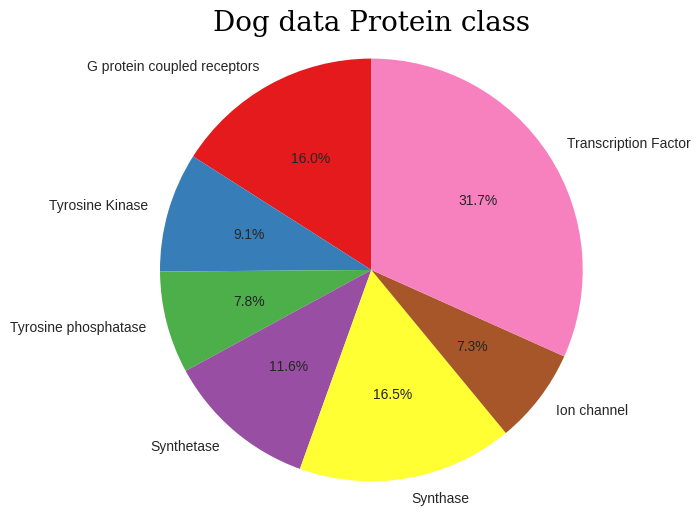

In [ ]:
plt.figure(figsize=(6,6))
font_dict=font = {'family': 'serif',
        'color':  'Black',
        'size': 20,
        }
a=np.random.random(7)
cs=cm.Set1(np.arange(7)/7.)
plt.pie(dog["class"].value_counts().sort_index(),labels=labels,autopct='%1.1f%%',colors=cs,startangle=90)
plt.axis('equal')
plt.title("Dog data Protein class",fontdict=font_dict)
#plt.style.use('dark_background')
plt.show()

In [ ]:
dog['sequence'][20]

'GGCCCCCGAGGCCCGAAGATGGGGAACTCCACCGCCGAGAACAACTCCCTGTGCACCATCGACCACACCATCCACCAGACGCTGGCCCCGGTGGTCTACGTGGCGGTGCTGGTGGTGGGCTTCCCGGCCAACTGCCTGTCGCTCTACTTCGGCTACCTGCAGATCAAGGCCCGGAACGAGCTGGGCGTGTACCTGTGCAACCTGACGCTGGCCGACCTCTTCTACATCTGCTCGCTCCCCTTCTGGCTGCAGTACGTGCTGCAGCACGACCACTGGTCGCACGGGGACCTGTCCTGCCAGGTGTGCGGCATCCTCCTCTACGAGAACATCTACATCAGCGTGGGCTTCCTCTGCTGCATCTCCATCGACCGCTACCTGGCCGTGGCGCACCCGTTCCGCTTCCACCAGTTCCGCACCCTCAAGGCGGCCGCGGGCGTGAGCGCGCTCATCTGGGCCAAGGAGCTGCTGACCAGCGTGTACTTCCTGATGCACAAGGAGGTGGTGGAGGACGAGGACCGGCACCGCGTCTGCTTCGAGCACTACCCGCTGGAGCCCTGGCAGCGCGGCATCAACTACTACCGCTTCCTGGTGGGCTTCCTGTTCCCGCTGGGCCTGCTGCTGGCCGCCTACCGCGGCATCCTGCGCGCCGTGCGCCGCAGCCACGGCACCCAGAAGAGCCGCAAGGACCAGATCCAGCGGCTGGTGCTCAGCACCGTGGTCATCTTCCTGGCCTGCTTCCTGCCCTACCACGCGCTGCTGCTCGTGCGCAGCCTCTGGGAGGCCAGCTGCCAGTTCGCCAGGGCCGTCTTCAACGCCTACCACTTCTCCCTGCTTCTCACCAGCTTCAACTGCGTGGCCGACCCCGTGCTCTACTGCTTCGTCAGCGAGTCCACGCACCGGGACCTGGGCCGCCTCCGCGGGGCCTGCCTGGCCTTCCTCAGCTGCGCCGGGCCCGGCCGGGCCGGGGAGGCCTACCCGCTGGGCGCCCCCGACGCCTCC

In [ ]:
def noise_check(arr):
    d=[]
    count = 0
    for i in range(0,len(arr)):
        for j in arr['sequence'][i]:
            if j!='A' and j!='T' and j!='C' and j!='G':
                count = count + 1
                d.append(j)
    if count>0:
        print(d)
        print('Noise Count',count)
    else:
        print('No noise')

In [ ]:
noise_check(dog)

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

In [ ]:
def remove_noise(arr):
  for i in range (0,len(arr)):
    arr['sequence'][i]=arr['sequence'][i].replace('N','')

In [ ]:
remove_noise(dog)

<ipython-input-118-b76a0a5e3e02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr['sequence'][i]=arr['sequence'][i].replace('N','')


In [ ]:
noise_check(dog)

No noise


In [ ]:
def missing_check(arr):
    classat=[]
    seqat=[]
    count = 0
    for i in range(0,len(arr)):
        if arr['sequence'][i]=='':
            seqat.append(i)
            count = count + 1
        if arr['class'][i]=='' or arr['class'][i]>6:
            classat.append(i)
            count = count + 1
    if count==0:
        print('No missing value')
    else:
        print('missing count = ',count)

In [ ]:
missing_check(dog)

No missing value


<Axes: >

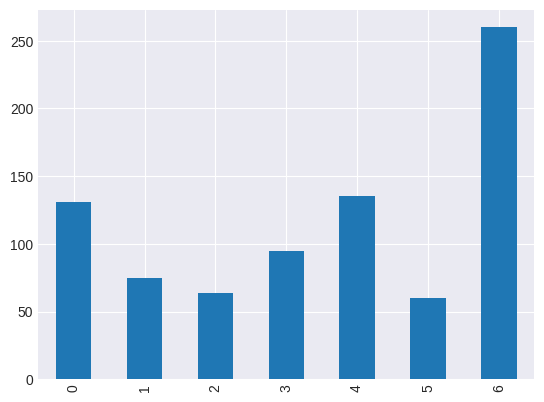

In [ ]:
dog['class'].value_counts().sort_index().plot.bar()
#plt.style.use('dark_background')

In [ ]:
y=dog.loc[:,'class'].values

# **Classifiers**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
documents = [
    "This is the first document.",
    "And My name is Manoj Dey.",
    "And team members are Sayantika Das,Koustubh Manjumdar,Madhushree Ghosh .",
    "Is this our first Prject ?"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()
print("Matrix of token counts:")
print(X.toarray())
print("\nFeature names:")
print(feature_names)

Matrix of token counts:
[[0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1]]

Feature names:
['and' 'are' 'das' 'dey' 'document' 'first' 'ghosh' 'is' 'koustubh'
 'madhushree' 'manjumdar' 'manoj' 'members' 'my' 'name' 'our' 'prject'
 'sayantika' 'team' 'the' 'this']


In [ ]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]
cv = CountVectorizer(ngram_range=(4,4))

In [ ]:
dog['Words']=dog.apply(lambda X: getKmers(X['sequence']),axis=1)
dog=dog.drop('sequence',axis =1)

In [ ]:
dog.head()

,class,Words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


In [ ]:
dog["in_string"] =dog['Words'].apply(lambda x:  ' '.join(x))

In [ ]:
dog[["Words","in_string"]]

,Words,in_string
0,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc...",atgcca tgccac gccaca ccacag cacagc acagct cagc...
1,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...",atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaa...
2,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac...",atggaa tggaaa ggaaac gaaaca aaacac aacacc acac...
3,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta...",atgtgc tgtgca gtgcac tgcact gcacta cactaa acta...
4,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc...",atgagc tgagcc gagccg agccgg gccggc ccggca cggc...
...,...,...
815,"[atggtc, tggtcg, ggtcgg, gtcggt, tcggtc, cggtc...",atggtc tggtcg ggtcgg gtcggt tcggtc cggtcc ggtc...
816,"[atggcg, tggcgg, ggcggc, gcggcg, cggcga, ggcga...",atggcg tggcgg ggcggc gcggcg cggcga ggcgac gcga...
817,"[atgagc, tgagct, gagctc, agctcg, gctcgg, ctcgg...",atgagc tgagct gagctc agctcg gctcgg ctcggc tcgg...
818,"[gccccg, ccccga, cccgag, ccgagg, cgagga, gagga...",gccccg ccccga cccgag ccgagg cgagga gaggat agga...


In [ ]:
print(dog['Words'][0])

['atgcca', 'tgccac', 'gccaca', 'ccacag', 'cacagc', 'acagct', 'cagcta', 'agctag', 'gctaga', 'ctagat', 'tagata', 'agatac', 'gataca', 'atacat', 'tacatc', 'acatcc', 'catcca', 'atccac', 'tccacc', 'ccacct', 'cacctg', 'acctga', 'cctgat', 'ctgatt', 'tgattt', 'gattta', 'atttat', 'tttatt', 'ttatta', 'tattat', 'attata', 'ttataa', 'tataat', 'ataatc', 'taatct', 'aatctt', 'atcttt', 'tctttt', 'cttttc', 'ttttca', 'tttcaa', 'ttcaat', 'tcaata', 'caatat', 'aatatt', 'atattt', 'tatttc', 'atttct', 'tttctc', 'ttctca', 'tctcac', 'ctcacc', 'tcaccc', 'caccct', 'accctc', 'ccctct', 'cctctt', 'ctcttc', 'tcttca', 'cttcat', 'ttcatc', 'tcatcc', 'catcct', 'atccta', 'tcctat', 'cctatt', 'ctattt', 'tatttc', 'atttca', 'tttcaa', 'ttcaac', 'tcaact', 'caacta', 'aactaa', 'actaaa', 'ctaaaa', 'taaaaa', 'aaaaat', 'aaaatt', 'aaattt', 'aatttc', 'atttca', 'tttcaa', 'ttcaaa', 'tcaaat', 'caaatc', 'aaatca', 'aatcac', 'atcact', 'tcacta', 'cactac', 'actact', 'ctacta', 'tactac', 'actacc', 'ctaccc', 'taccca', 'acccag', 'cccaga', 'ccagaa',

In [ ]:
dog_texts1 = list(dog['Words'])
for item in range(len(dog_texts1)):
    dog_texts1[item] = ' '.join(dog_texts1[item])

In [ ]:
X_d = cv.fit_transform( dog_texts1)
y_d = dog.iloc[:, 0].values

In [ ]:
print(X_d.shape,y_d.shape)

(820, 227012) (820,)


In [ ]:
i=0
for key,value in cv.vocabulary_.items():
    print(f"{key} : {value}")
    i+=1
    if i>10:break

atgcca tgccac gccaca ccacag : 51727
tgccac gccaca ccacag cacagc : 202879
gccaca ccacag cacagc acagct : 133058
ccacag cacagc acagct cagcta : 73931
cacagc acagct cagcta agctag : 62129
acagct cagcta agctag gctaga : 17035
cagcta agctag gctaga ctagat : 66995
agctag gctaga ctagat tagata : 35530
gctaga ctagat tagata agatac : 140079
ctagat tagata agatac gataca : 101414
tagata agatac gataca atacat : 178529


In [ ]:
(dog_texts1[1])

'atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatcta atctat tctatt ctattc tattcg attcgc ttcgct tcgctt cgcttc gcttct cttctt ttcttt tctttc ctttcg tttcgc ttcgct tcgctg cgctgc gctgcc ctgccc tgcccc gccccc ccccct cccctc ccctca cctcaa ctcaat tcaata caataa aataat ataata taatag aatagg ataggt taggtc aggtct ggtctc gtctcc tctccc ctccct tcccta ccctat cctatt ctattg tattgt attgtg ttgtgg tgtggt gtggta tggtac ggtact gtactg tactga actgat ctgatc tgatcg gatcgt atcgtc tcgtca cgtcat gtcata tcatat catatt atattc tattcc attccc ttccct tccctt cccttc ccttcc cttcca ttccat tccatt ccattt catttt atttta ttttat tttatt ttattc tattcc attccc ttccca tcccaa cccaac ccaaca caacac aacacc acaccc caccca acccag cccagt ccagtc cagtcg agtcgc gtcgcc tcgcct cgccta gcctaa cctaat ctaatc taatca aatcaa atcaat tcaata caataa aataat ataatc taatcg aatcgg atcggt tcggtt cggtta ggttaa gttaat ttaatc taatct aatctc atctcc tctcca ctccat tccatt ccattc cattca attcag ttcagc tcagca cagcaa agcaat gcaatg caatga aatgac atgact tgacta gacta

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import *

In [ ]:
from sklearn.model_selection import train_test_split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d,y_d,test_size = 0.25,random_state=42)

In [ ]:
dtree_d = DecisionTreeClassifier()
dtree_d.fit(X_train_d,y_train_d)
dtree_d_pred = dtree_d.predict(X_test_d)
print(confusion_matrix(y_test_d, dtree_d_pred))
print(classification_report(y_test_d, dtree_d_pred))

[[14  1  2  2  6  3  6]
 [ 2 13  1  1  3  0  1]
 [ 1  0 15  0  3  0  1]
 [ 4  1  0  5  7  1  5]
 [ 1  0  1  1 14  0 10]
 [ 2  1  0  2  1  4  5]
 [ 3  0  0  8 16  0 38]]
              precision    recall  f1-score   support

           0       0.52      0.41      0.46        34
           1       0.81      0.62      0.70        21
           2       0.79      0.75      0.77        20
           3       0.26      0.22      0.24        23
           4       0.28      0.52      0.36        27
           5       0.50      0.27      0.35        15
           6       0.58      0.58      0.58        65

    accuracy                           0.50       205
   macro avg       0.53      0.48      0.49       205
weighted avg       0.53      0.50      0.51       205



In [ ]:
rf_d = RandomForestClassifier(n_estimators=400)
rf_d.fit(X_train_d,y_train_d)
rf_d_pred = rf_d.predict(X_test_d)
print(confusion_matrix(y_test_d, rf_d_pred))
print(classification_report(y_test_d, rf_d_pred))

[[ 9  0  0  0  0  0 25]
 [ 3  9  0  0  1  0  8]
 [ 0  0 17  0  0  0  3]
 [ 1  0  0  5  2  0 15]
 [ 0  0  0  0  9  0 18]
 [ 4  0  0  0  0  6  5]
 [ 1  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.50      0.26      0.35        34
           1       1.00      0.43      0.60        21
           2       1.00      0.85      0.92        20
           3       1.00      0.22      0.36        23
           4       0.75      0.33      0.46        27
           5       1.00      0.40      0.57        15
           6       0.46      0.98      0.63        65

    accuracy                           0.58       205
   macro avg       0.82      0.50      0.56       205
weighted avg       0.71      0.58      0.55       205



In [ ]:
xgb_d = xgb.XGBClassifier()
xgb_d.fit(X_train_d,y_train_d)
xgb_d_pred = xgb_d.predict(X_test_d)
print(confusion_matrix(y_test_d, xgb_d_pred))
print(classification_report(y_test_d,xgb_d_pred))

[[17  0  0  2  3  0 12]
 [ 0 13  0  0  5  0  3]
 [ 0  0 16  0  0  0  4]
 [ 3  0  0  8  4  0  8]
 [ 5  0  0  0  9  0 13]
 [ 1  0  0  1  1  8  4]
 [ 1  0  0  1  2  0 61]]
              precision    recall  f1-score   support

           0       0.63      0.50      0.56        34
           1       1.00      0.62      0.76        21
           2       1.00      0.80      0.89        20
           3       0.67      0.35      0.46        23
           4       0.38      0.33      0.35        27
           5       1.00      0.53      0.70        15
           6       0.58      0.94      0.72        65

    accuracy                           0.64       205
   macro avg       0.75      0.58      0.63       205
weighted avg       0.69      0.64      0.63       205



In [ ]:
NB_d = MultinomialNB(alpha=0.1)
NB_d.fit(X_train_d,y_train_d)
NB_d_pred = NB_d.predict(X_test_d)
print(confusion_matrix(y_test_d, NB_d_pred))
print(classification_report(y_test_d,NB_d_pred))

[[25  0  0  0  0  0  9]
 [ 3 15  0  0  0  0  3]
 [ 1  0 14  0  0  0  5]
 [ 2  0  0 10  0  0 11]
 [ 4  0  0  3  7  0 13]
 [ 2  0  0  2  0  6  5]
 [ 1  0  0  2  0  0 62]]
              precision    recall  f1-score   support

           0       0.66      0.74      0.69        34
           1       1.00      0.71      0.83        21
           2       1.00      0.70      0.82        20
           3       0.59      0.43      0.50        23
           4       1.00      0.26      0.41        27
           5       1.00      0.40      0.57        15
           6       0.57      0.95      0.72        65

    accuracy                           0.68       205
   macro avg       0.83      0.60      0.65       205
weighted avg       0.76      0.68      0.66       205



In [ ]:
AdaB_d = AdaBoostClassifier(n_estimators=400)
AdaB_d.fit(X_train_d,y_train_d)
AdaB_d_pred = AdaB_d.predict(X_test_d)
print(confusion_matrix(y_test_d, AdaB_d_pred))
print(classification_report(y_test_d, AdaB_d_pred))

[[ 2  5  0  1  4  2 20]
 [ 4  2  0  1  3  0 11]
 [ 2  0 16  0  0  0  2]
 [ 5  3  0  1  3  2  9]
 [ 5  2  0  2  3  0 15]
 [ 3  0  0  0  2  2  8]
 [ 6  2  0  4  7  3 43]]
              precision    recall  f1-score   support

           0       0.07      0.06      0.07        34
           1       0.14      0.10      0.11        21
           2       1.00      0.80      0.89        20
           3       0.11      0.04      0.06        23
           4       0.14      0.11      0.12        27
           5       0.22      0.13      0.17        15
           6       0.40      0.66      0.50        65

    accuracy                           0.34       205
   macro avg       0.30      0.27      0.27       205
weighted avg       0.30      0.34      0.30       205



In [ ]:
MLP_d = MLPClassifier(alpha=1)
MLP_d.fit(X_train_d,y_train_d)
MLP_d_pred = MLP_d.predict(X_test_d)
print(confusion_matrix(y_test_d, MLP_d_pred))
print(classification_report(y_test_d, MLP_d_pred))

[[22  1  0  1  2  1  7]
 [ 0 15  0  1  1  0  4]
 [ 0  0 12  0  1  0  7]
 [ 0  0  0  8  9  0  6]
 [ 0  0  0  1 11  1 14]
 [ 2  0  0  1  1  7  4]
 [ 0  0  0  1  2  0 62]]
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        34
           1       0.94      0.71      0.81        21
           2       1.00      0.60      0.75        20
           3       0.62      0.35      0.44        23
           4       0.41      0.41      0.41        27
           5       0.78      0.47      0.58        15
           6       0.60      0.95      0.73        65

    accuracy                           0.67       205
   macro avg       0.75      0.59      0.64       205
weighted avg       0.71      0.67      0.66       205



In [ ]:
SVC_d = SVC()
SVC_d.fit(X_train_d,y_train_d)
SVC_d_pred = SVC_d.predict(X_test_d)
print(confusion_matrix(y_test_d, SVC_d_pred))
print(classification_report(y_test_d, SVC_d_pred))

[[ 7  0  0  0  0  0 27]
 [ 2  8  0  0  0  0 11]
 [ 1  0  8  0  0  0 11]
 [ 2  0  0  3  0  0 18]
 [ 2  0  0  0  5  0 20]
 [ 2  0  0  0  0  4  9]
 [ 0  0  0  0  0  0 65]]
              precision    recall  f1-score   support

           0       0.44      0.21      0.28        34
           1       1.00      0.38      0.55        21
           2       1.00      0.40      0.57        20
           3       1.00      0.13      0.23        23
           4       1.00      0.19      0.31        27
           5       1.00      0.27      0.42        15
           6       0.40      1.00      0.58        65

    accuracy                           0.49       205
   macro avg       0.83      0.37      0.42       205
weighted avg       0.72      0.49      0.44       205



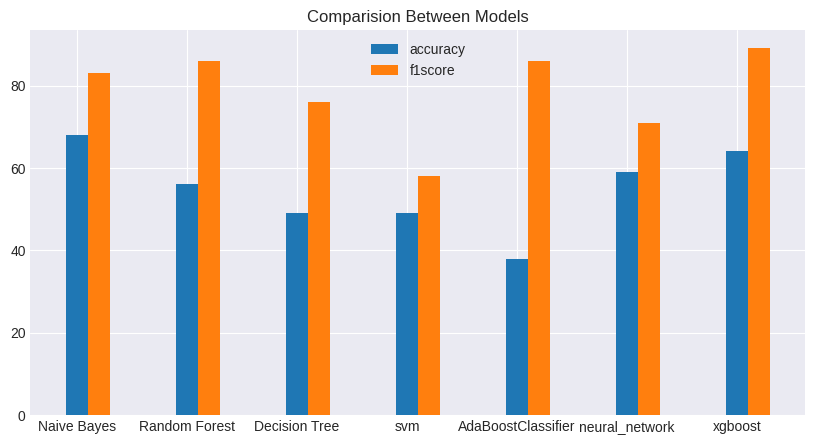

In [ ]:
plt.figure(figsize=(10,5))
scores=["Naive Bayes","Random Forest","Decision Tree","svm","AdaBoostClassifier","neural_network","xgboost"]
accscore=[68,56,49,49,38,59,64]
f1score=[83,86,76,58,86,71,89]
w=0.2
bar1=np.arange(len(scores))
bar2=[i+w for i in bar1]

plt.bar(bar1,accscore,w,label="accuracy")
plt.bar(bar2,f1score,w,label="f1score")
plt.xticks(bar1, scores)
plt.legend()
plt.title("Comparision Between Models")
#plt.style.use('dark_background')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d,
                                                    y_d,
                                                    test_size = 0.20,
                                                    random_state=42)
nb_ =MultinomialNB(alpha=0.01)
nb_.fit(X_train_d, y_train_d)

y_pred = nb_.predict(X_test_d)
print(pd.crosstab(pd.Series(y_test_d, name='Actual'), pd.Series(y_pred, name='Predicted')))

Predicted   0  1  2  3  4  5   6
Actual                          
0          16  0  0  0  0  0  11
1           0  7  0  0  0  0  12
2           0  0  9  0  0  0   5
3           0  0  0  4  0  0  12
4           2  0  0  0  7  0  14
5           1  0  0  0  0  5   7
6           0  0  0  0  0  0  52


In [ ]:
import pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(nb_, open(filename, 'wb'))

<Axes: xlabel='Predicted', ylabel='Actual'>

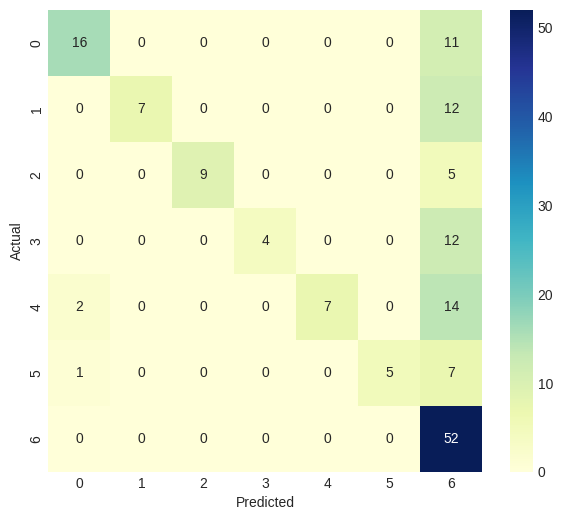

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(pd.crosstab(pd.Series(y_test_d, name='Actual'), pd.Series(y_pred, name='Predicted')),cmap="YlGnBu",annot=True,fmt='d')
#plt.style.use('dark_background')

# **Human VS Dog**

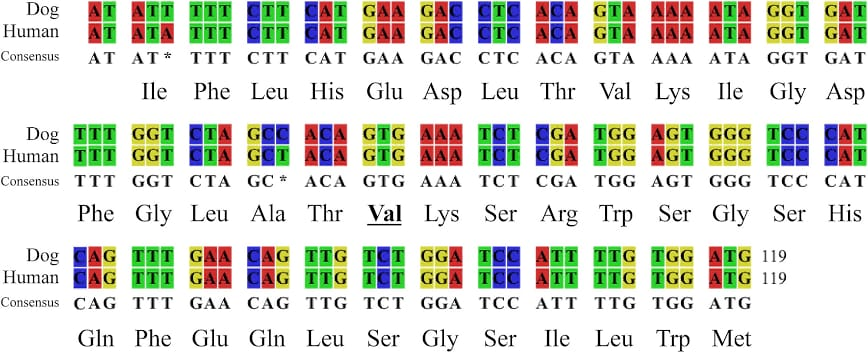

In [ ]:
Image('/content/drive/MyDrive/humanDNAvsdogDNA.jpg')

# **Calculating The Sequence of Dog DNA**

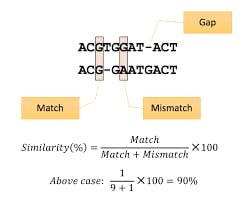

In [ ]:
Image('/content/drive/MyDrive/dog_dna_calculation.jpg')